<a href="https://colab.research.google.com/github/saaim23/saaim23/blob/main/Crypto_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [3]:
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from google.colab import userdata
api_key=userdata.get('Crypto_api')


# Making functions


In [ ]:
def fetch_historical_data(coin_id, vs_currency, days, api_key=None):
    url = f'https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart'
    params = {'vs_currency': vs_currency, 'days': days}
    headers = {}
    if api_key:
        headers = {'Authorization': f'Bearer {api_key}'}
    response = requests.get(url, params=params, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    else:
        raise ValueError(f"Error fetching data: {response.status_code} - {response.text}")


In [ ]:
def preprocess_data(df, time_step):
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    df['price'] = df['price'].astype(float)

    # Scale prices
    price_scaler = MinMaxScaler(feature_range=(0, 1))
    df['scaled_price'] = price_scaler.fit_transform(df[['price']])

    # Create sequences
    data = df['scaled_price'].values
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i])
        y.append(data[i])
    X, y = np.array(X), np.array(y)

    return X, y, price_scaler


In [ ]:
def train_lstm(X_train, y_train, time_step):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)
    return model

In [ ]:
def visualize_results(y_test, y_pred, price_scaler):
    y_test_rescaled = price_scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_rescaled = price_scaler.inverse_transform(y_pred.reshape(-1, 1))

    plt.figure(figsize=(14, 6))
    plt.plot(y_test_rescaled, label='Actual Prices', color='blue')
    plt.plot(y_pred_rescaled, label='Predicted Prices (LSTM)', color='red')
    plt.title('Bitcoin Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [ ]:
def calculate_metrics(y_test, y_pred_lr, y_pred_rf, y_pred_lstm):
    metrics = {
        "Linear Regression": {
            "MSE": mean_squared_error(y_test, y_pred_lr),
            "MAE": mean_absolute_error(y_test, y_pred_lr),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr)),
            "R2": r2_score(y_test, y_pred_lr)
        },
        "Random Forest": {
            "MSE": mean_squared_error(y_test, y_pred_rf),
            "MAE": mean_absolute_error(y_test, y_pred_rf),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
            "R2": r2_score(y_test, y_pred_rf)
        },
        "LSTM": {
            "MSE": mean_squared_error(y_test, y_pred_lstm),
            "MAE": mean_absolute_error(y_test, y_pred_lstm),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lstm)),
            "R2": r2_score(y_test, y_pred_lstm)
        }
    }
    return metrics


# using all those funtion / Excecuting

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0895
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0203
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0094
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0088
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0062
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0062
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0053
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0053
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0043
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0053
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0058
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0052
Epoch 13/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0045
Epoch 14/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0051
Epoch 15/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0054
Epoch 16/200
8/8 ━━━━━━━━━━━━━━

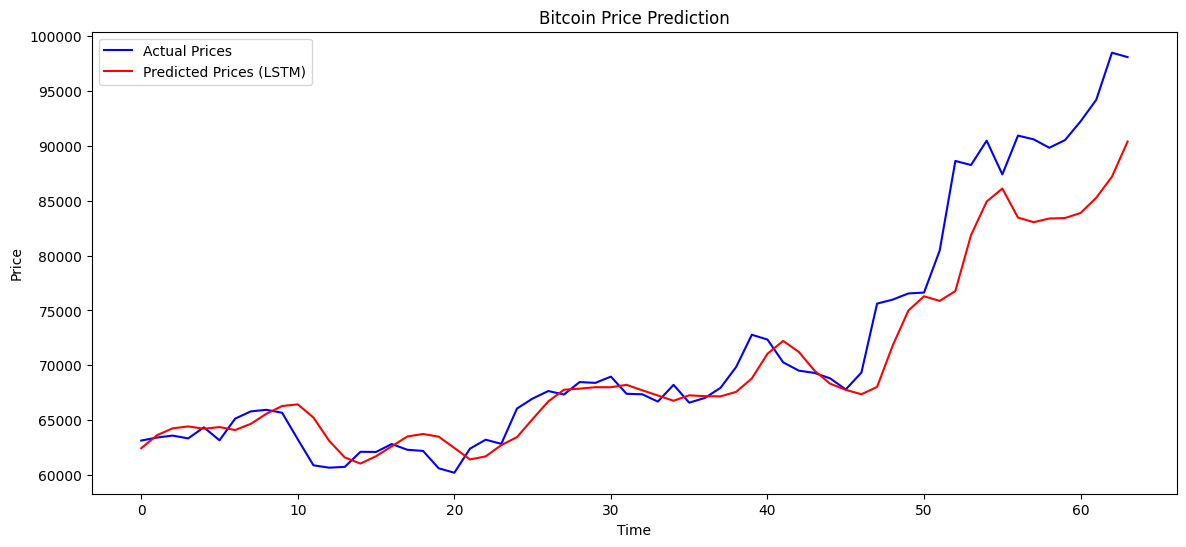

In [ ]:
price_df = fetch_historical_data(coin_id, vs_currency, days, api_key)
X, y, price_scaler = preprocess_data(price_df, time_step)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


model = train_lstm(X_train, y_train, time_step)

y_pred = model.predict(X_test)


visualize_results(y_test, y_pred, price_scaler)